This file is part of GaPSE
Copyright (C) 2022 Matteo Foglieni

GaPSE is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

GaPSE is distributed in the hope that it will be useful, but
WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU
General Public License for more details.

You should have received a copy of the GNU General Public License
along with GaPSE. If not, see <http://www.gnu.org/licenses/>.
```


```

# Application of GaPSE to the eBOSS window

As an example, we apply GaPSE on the eBOSS window.

In [1]:
DIR = "eBOSS_Window/";
COMPUTE_XIS_GNC = false;

## Creation of a Cosmology

In [2]:
PATH_TO_GAPSE = "../";

In [3]:
include(PATH_TO_GAPSE * "src/GaPSE.jl");

In [4]:
using DelimitedFiles, Plots, Dierckx, SpecialFunctions, TwoFAST, ProgressMeter
using Printf, LaTeXStrings, GridInterpolations, LegendrePolynomials

In [5]:
#FILE_F_MAP =  PATH_TO_GAPSE * "data/NEW_F_pi2.txt";
FILE_F_MAP =  PATH_TO_GAPSE * "data/F_REFERENCE_pi2.txt";
#=
kwargs_map_F_hcub = Dict(
     :θ_max => π / 2.0, :tolerance => 1e-10, 
     :rtol => 1e-2, :atol => 1e-3, :pr => true,
);

kwargs_map_F_trap = Dict(
     :θ_max => π / 2.0, :tolerance => 1e-10, 
     :N => 1000, :pr => true,
);

xs = [x for x in 0:0.02:5]
μs = union(
    [μ for μ in range(-1.0, -0.98, length = 50)], 
    [μ for μ in range(-0.98, 0.98, length = 102)],
    [μ for μ in range(0.98, 1.0, length = 50)]);
GaPSE.print_map_F(FILE_F_MAP, xs, μs; 
    alg = :trap, Fmap_opts = kwargs_map_F_trap # we recommend to use :trap
    #alg = :hcub, Fmap_opts = kwargs_map_F_hcub # but you can use also :hcub if you prefer
)
=#

"../data/F_REFERENCE_pi2.txt"

In [6]:
#cs=GaPSE.CosmoSplines(PATH_TO_GAPSE * "data/WideA_ZA_background.dat", 0.01, 3)

In [7]:
#GaPSE.func_z_eff(cs.s_of_z(0.93), cs.s_of_z(2), cs.z_of_s)

In [8]:
#z_min, z_max, θ_max = 1.0, 1.5, π / 2.0
z_min, z_max, θ_max = 0.93, 2.0, π / 2.0

FILE_BACKGROUND = PATH_TO_GAPSE * "data/WideA_ZA_background.dat";

#=
WFI_opts = Dict(
    :llim => nothing, :rlim => nothing, 
    :rtol => 1e-2, :atol => 0.0, 
    :N => 1000, :pr => true,
)
=#

params = GaPSE.CosmoParams(z_min, z_max, θ_max;
    Ω_b = 0.0489, Ω_cdm = 0.251020, 
    h_0 = 0.70, s_lim = 1e-2, z_spline_lim = 1000.0,
    b1 = 2.5, s_b1 = 0.0, 𝑓_evo1 = 0.0,
    b2 = nothing, s_b2 = nothing, 𝑓_evo2 = nothing,
    IPS_opts = Dict(
        :fit_left_min => 1e-6, :fit_left_max => 3e-6,
        :fit_right_min => 1e1, :fit_right_max => 2e1),
    IPSTools_opts = Dict(
        :N => 1024, :fit_min => 0.05, :fit_max => 0.5, 
        :con => true, :k_min => 1e-8, :k_max => 10.0),
    #=
    WFI_opts = Dict(
        :llim => nothing, :rlim => nothing, 
        :rtol => 1e-2, :atol => 0.0, 
        :N => 1000, :pr => true,)
    =#
);

In [9]:
#FILE_F_MAP =  PATH_TO_GAPSE * "data/NEW_F_pi2.txt";
#FILE_IF_MAP = PATH_TO_GAPSE * "data/NEW_IntegrF_pi2_z115.txt";

#FILE_F_MAP = PATH_TO_GAPSE*"data/F_REFERENCE_pi2.txt";
FILE_IF_MAP = PATH_TO_GAPSE*"data/IntegrF_REFERENCE_pi2_z115.txt";

#=
calc_μs = union(
    [μ for μ in range(-1.0, -0.98, length = 50)], 
    [μ for μ in range(-0.98, 0.98, length = 102)],
    [μ for μ in range(0.98, 1.0, length = 50)]);

GaPSE.print_map_IntegratedF(
    z_min, z_max, calc_μs,
    FILE_F_MAP, FILE_IF_MAP, 
    FILE_BACKGROUND;
    alg = :trap, N_ss = 200, m = 2.1,
    Dict(
        :llim => nothing, :rlim => nothing, 
        :rtol => 1e-2, :atol => 0.0, 
        :N => 1000, :pr => true,
    )...
)
=#

"../data/IntegrF_REFERENCE_pi2_z115.txt"

In [10]:
FILE_PS = PATH_TO_GAPSE * "test/datatest/file_pk.txt";
cosmo = GaPSE.Cosmology(params, FILE_BACKGROUND, FILE_PS, FILE_F_MAP, FILE_IF_MAP);

GaPSE.parameters_used(stdout, cosmo)

###################################
#   ____       ____  ____  _____  #
#  / ___| __ _|  _ \/ ___|| ____| #
# | |  _ / _` | |_) \___ \|  _|   #
# | |_| | (_| |  __/ ___) | |___  # 
#  \____|\__,_|_|   |____/|_____| #
###################################
# 
# The Cosmology considered had the following paremeters:
# 
# - Matter Power Spectrum input file: "../test/datatest/file_pk.txt"
# - Background data input file: "../data/WideA_ZA_background.dat"
# - F window function input file: "../data/F_REFERENCE_pi2.txt"
# - Integrated F window function input file: "../data/IntegrF_REFERENCE_pi2_z115.txt"
#
# - Basic CosmoParams considered: 
#	 z_min = 0.93 	 z_max = 2.0
#	 θ_max = 1.5707963267948966 [rad] 	 h_0 = 0.7
#	 Ω_b = 0.0489 	 Ω_cdm = 0.25102 	 Ω_M0 = 0.29992
#	 b1 = 2.5 	 f_evo1 = 0.0 	 s_b1 = 0.0
#	 b2 = 2.5 	 f_evo2 = 0.0 	 s_b2 = 0.0
#
# - CosmoParams about the Input Power Spectrum: 
#	 fit_left_min = 1.0e-6 	 fit_right_min = 10.0 	 
#	 fit_left_max = 3.0e-6 	 fit_right_max = 20.0 	 


## Ql multipoles

In [11]:
name_file_Qmultipoles = DIR*"eBOSS_window_NGC.txt"
s_vec, all_Q_l1 = GaPSE.readxall(name_file_Qmultipoles);

┌ Warning: backend `PyPlot` is not installed.
└ @ Plots /Users/di75tom/.julia/packages/Plots/Hxe7H/src/backends.jl:37


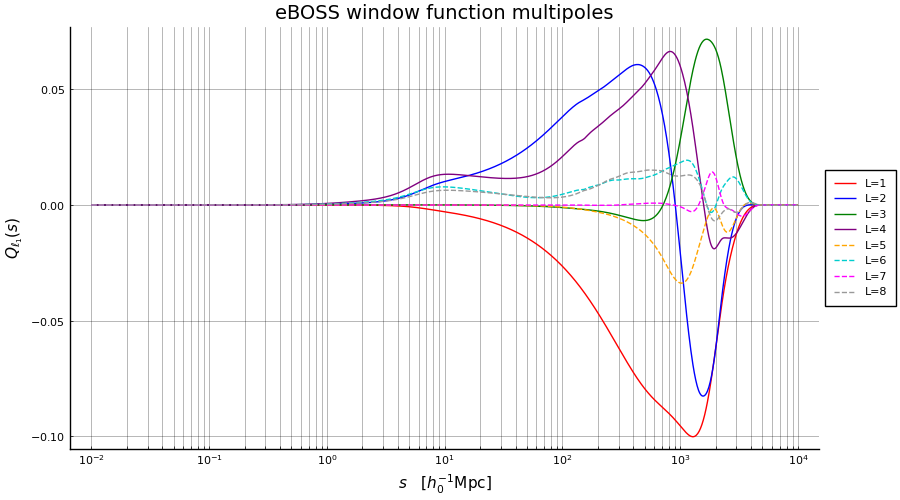

In [12]:
pyplot()
p=plot( 
    xaxis=:log, size=(900,500),
    xlabel=L"s \quad [h_0^{-1}\mathrm{Mpc}]", 
    ylabel=L"Q_{\ell_1}(s)", gridalpha=0.4,
    title="eBOSS window function multipoles",
    xticks = (
        vcat([a*10.0^b for b in -2:3 for a in 1:9], 10.0^4), 
        vcat([a==1 ? L"10^{%$b}" : nothing for b in -2:3 for a in 1:9], L"10^{4}")
    ), legend=:outerright)
ls(L) = L ∈ [0,1,2,3,4] ? :solid : :dash
for L in 1:8
    plot!(p, s_vec, all_Q_l1[L+1], xaxis=:log, label="L=$L", ls=ls(L))
end
p

In [13]:
all_Q_l1[1][1]

0.906406312145046

```


```

## Compute the TPCFs

In [14]:
name_xis_GNC_L0_noF_noobsvel_file = DIR * "all_xis_GNC_L0_noF_noobsvel_eBOSS.txt";
name_xis_GNC_L1_noF_noobsvel_file = DIR * "all_xis_GNC_L1_noF_noobsvel_eBOSS.txt";
name_xis_GNC_L2_noF_noobsvel_file = DIR * "all_xis_GNC_L2_noF_noobsvel_eBOSS.txt";
name_xis_GNC_L3_noF_noobsvel_file = DIR * "all_xis_GNC_L3_noF_noobsvel_eBOSS.txt";
name_xis_GNC_L4_noF_noobsvel_file = DIR * "all_xis_GNC_L4_noF_noobsvel_eBOSS.txt";
name_xis_GNC_L5_noF_noobsvel_file = DIR * "all_xis_GNC_L5_noF_noobsvel_eBOSS.txt";
name_xis_GNC_L6_noF_noobsvel_file = DIR * "all_xis_GNC_L6_noF_noobsvel_eBOSS.txt";
name_xis_GNC_L7_noF_noobsvel_file = DIR * "all_xis_GNC_L7_noF_noobsvel_eBOSS.txt";
name_xis_GNC_L8_noF_noobsvel_file = DIR * "all_xis_GNC_L8_noF_noobsvel_eBOSS.txt";

In [15]:
if COMPUTE_XIS_GNC == true
    GaPSE.print_map_sum_ξ_GNC_multipole(
        cosmo, name_xis_GNC_L0_noF_noobsvel_file,
        10 .^ range(0, log10(2 * cosmo.s_max), length=500);
        use_windows=false, L=0, alg=:quad, obs=:noobsvel,
        single=true, enhancer=1e8,
        N_trap=200, N_lob=200, atol_quad=0.0, rtol_quad=1e-2,
        N_χs=100, N_χs_2=60, suit_sampling=true
    )
end

In [16]:
if COMPUTE_XIS_GNC == true
    GaPSE.print_map_sum_ξ_GNC_multipole(
        cosmo, name_xis_GNC_L1_noF_noobsvel_file,
        10 .^ range(0, log10(2 * cosmo.s_max), length=500);
        use_windows=false, L=1, alg=:lobatto, obs=:noobsvel,
        single=true, enhancer=1e8,
        N_trap=200, N_lob=1000, atol_quad=0.0, rtol_quad=1e-2,
        N_χs=100, N_χs_2=50, suit_sampling=true
    )
end

In [17]:
if COMPUTE_XIS_GNC == true
    GaPSE.print_map_sum_ξ_GNC_multipole(
        cosmo, name_xis_GNC_L2_noF_noobsvel_file,
        10 .^ range(0, log10(2 * cosmo.s_max), length=500);
        use_windows=false, L=2, alg=:lobatto, obs=:noobsvel,
        single=true, enhancer=1e8,
        N_trap=200, N_lob=1000, atol_quad=0.0, rtol_quad=1e-2,
        N_χs=100, N_χs_2=50, suit_sampling=true
    )
end

In [18]:
if COMPUTE_XIS_GNC == true
    GaPSE.print_map_sum_ξ_GNC_multipole(
        cosmo, name_xis_GNC_L3_noF_noobsvel_file,
        10 .^ range(0, log10(2 * cosmo.s_max), length=500);
        use_windows=false, L=3, alg=:lobatto, obs=:noobsvel,
        single=true, enhancer=1e8,
        N_trap=200, N_lob=1000, atol_quad=0.0, rtol_quad=1e-2,
        N_χs=100, N_χs_2=50, suit_sampling=true
    )
end

In [19]:
if COMPUTE_XIS_GNC == true
    GaPSE.print_map_sum_ξ_GNC_multipole(
        cosmo, name_xis_GNC_L4_noF_noobsvel_file,
        10 .^ range(0, log10(2 * cosmo.s_max), length=500);
        use_windows=false, L=4, alg=:lobatto, obs=:noobsvel,
        single=true, enhancer=1e8,
        N_trap=200, N_lob=1000, atol_quad=0.0, rtol_quad=1e-2,
        N_χs=100, N_χs_2=50, suit_sampling=true
    )
end

In [20]:
if COMPUTE_XIS_GNC == true
    GaPSE.print_map_sum_ξ_GNC_multipole(
        cosmo, name_xis_GNC_L5_noF_noobsvel_file,
        10 .^ range(0, log10(2 * cosmo.s_max), length=500);
        use_windows=false, L=5, alg=:lobatto, obs=:noobsvel,
        single=true, enhancer=1e8,
        N_trap=200, N_lob=1000, atol_quad=0.0, rtol_quad=1e-2,
        N_χs=100, N_χs_2=50, suit_sampling=true
    )
end

In [21]:
if COMPUTE_XIS_GNC == true
    GaPSE.print_map_sum_ξ_GNC_multipole(
        cosmo, name_xis_GNC_L6_noF_noobsvel_file,
        10 .^ range(0, log10(2 * cosmo.s_max), length=500);
        use_windows=false, L=6, alg=:lobatto, obs=:noobsvel,
        single=true, enhancer=1e8,
        N_trap=200, N_lob=1000, atol_quad=0.0, rtol_quad=1e-2,
        N_χs=100, N_χs_2=50, suit_sampling=true
    )
end

In [22]:
if COMPUTE_XIS_GNC == true
    GaPSE.print_map_sum_ξ_GNC_multipole(
        cosmo, name_xis_GNC_L7_noF_noobsvel_file,
        10 .^ range(0, log10(2 * cosmo.s_max), length=500);
        use_windows=false, L=7, alg=:lobatto, obs=:noobsvel,
        single=true, enhancer=1e8,
        N_trap=200, N_lob=1000, atol_quad=0.0, rtol_quad=1e-2,
        N_χs=100, N_χs_2=50, suit_sampling=true
    )
end

In [23]:
if COMPUTE_XIS_GNC == true
    GaPSE.print_map_sum_ξ_GNC_multipole(
        cosmo, name_xis_GNC_L8_noF_noobsvel_file,
        10 .^ range(0, log10(2 * cosmo.s_max), length=500);
        use_windows=false, L=8, alg=:lobatto, obs=:noobsvel,
        single=true, enhancer=1e8,
        N_trap=200, N_lob=1000, atol_quad=0.0, rtol_quad=1e-2,
        N_χs=100, N_χs_2=50, suit_sampling=true
    )
end

## PS_multipole_GenWin of eBOSS

In [24]:
name_file_ximultipoles = DIR*"xis_GNC_L012345678_noF_noobsvel_eBOSS.txt"

vector_xis_names = [
    name_xis_GNC_L0_noF_noobsvel_file,
    name_xis_GNC_L1_noF_noobsvel_file,
    name_xis_GNC_L2_noF_noobsvel_file,
    name_xis_GNC_L3_noF_noobsvel_file,
    name_xis_GNC_L4_noF_noobsvel_file,
    name_xis_GNC_L5_noF_noobsvel_file,
    name_xis_GNC_L6_noF_noobsvel_file,
    name_xis_GNC_L7_noF_noobsvel_file,
    name_xis_GNC_L8_noF_noobsvel_file,
];

GaPSE.create_file_for_XiMultipoles(name_file_ximultipoles, vector_xis_names, 2, "GNC");

run(`head -n 28 $(name_file_ximultipoles)`)

###################################
#   ____       ____  ____  _____  #
#  / ___| __ _|  _ \/ ___|| ____| #
# | |  _ / _` | |_) \___ \|  _|   #
# | |_| | (_| |  __/ ___) | |___  # 
#  \____|\__,_|_|   |____/|_____| #
###################################
# 
#
# This is a table containing the multipoles of the Two-Point Correlation Function (TPCF) 
# for the Galaxy Number Counts GR effect [not given, provied only the index 2]
#  taken from the files:
#   - L = 0 : eBOSS_Window/all_xis_GNC_L0_noF_noobsvel_eBOSS.txt
#   - L = 1 : eBOSS_Window/all_xis_GNC_L1_noF_noobsvel_eBOSS.txt
#   - L = 2 : eBOSS_Window/all_xis_GNC_L2_noF_noobsvel_eBOSS.txt
#   - L = 3 : eBOSS_Window/all_xis_GNC_L3_noF_noobsvel_eBOSS.txt
#   - L = 4 : eBOSS_Window/all_xis_GNC_L4_noF_noobsvel_eBOSS.txt
#   - L = 5 : eBOSS_Window/all_xis_GNC_L5_noF_noobsvel_eBOSS.txt
#   - L = 6 : eBOSS_Window/all_xis_GNC_L6_noF_noobsvel_eBOSS.txt
#   - L = 7 : eBOSS_Window/all_xis_GNC_L7_noF_noobsvel_eBOSS.txt
#   - L = 8 : eBOSS_Window/a

Process(`head -n 28 eBOSS_Window/xis_GNC_L012345678_noF_noobsvel_eBOSS.txt`, ProcessExited(0))


I'm computing the PS_multipole_GenWin.
The Xi Multipoles were taken from the file: eBOSS_Window/xis_GNC_L012345678_noF_noobsvel_eBOSS.txt
The Generic Window was taken from the file: eBOSS_Window/eBOSS_window_NGC.txt

time needed for this Power Spectrum computation [in s] = 0.05695986747741699




time needed for this Power Spectrum computation [in s] = 0.0004889965057373047



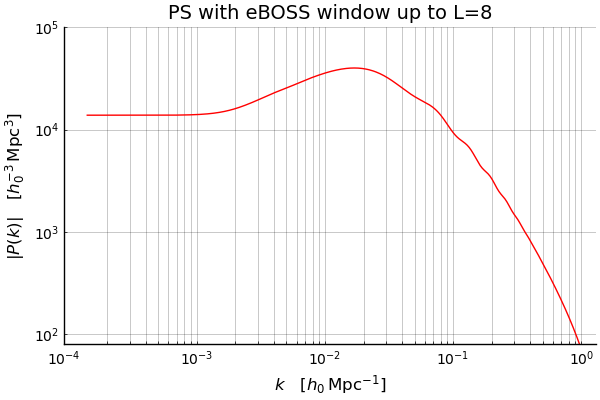

In [25]:
ps_kwargs(alg::Symbol = :fftlog) = alg == :twofast ?
    Dict(
        :alg => :twofast, :epl => true, :pr => false, 
        :N_left => 12, :N_right => 12,
        :p0_left => [-2.0, 1.0], :p0_right => [-2.0, 1.0],
        :int_s_min => 1e0, :int_s_max => 1200.0,
        :cut_first_n=>0, :cut_last_n => 0
    ) : alg == :fftlog ?
    Dict(
        :alg => :fftlog, :pr=>true, :ν => 1.5, 
        :n_extrap_low => 0, :n_extrap_high => 0, 
        :n_pad => 500, :cut_first_n=>0, :cut_last_n => 0,
    ) : throw(AssertionError("alg = :fftlog (recommended) or alg = :twofast !"));
tf = :fftlog;

name_file_pks_eboss = DIR*"PS_eBOSS_until_L8.txt"
GaPSE.print_PS_multipole_GenWin(name_file_ximultipoles, name_file_Qmultipoles, name_file_pks_eboss; L=0, ps_kwargs(:fftlog)...);
ks, pks = GaPSE.readxy(name_file_pks_eboss);
#ks, pks = GaPSE.PS_multipole_GenWin(name_file_ximultipoles, "../../GaPSE-free-ipynb/ARTICLE_RESULTS/ARTICLE_GenWin/QL_s_Lmax4.dat"; 
#    L=0, ps_kwargs(:fftlog)...);
plot(ks[pks.≠0],abs.(pks)[pks.≠0], axis=:log, 
    ylabel = L"|P(k)| \quad [h_0^{-3}\,\mathrm{Mpc}^3]", 
    xlabel=L"$k \quad [h_0 \,\mathrm{Mpc}^{-1}]$",
    title="PS with eBOSS window up to L=8",
    yticks=[10.0^i for i in 2:5], tickfontsize = 10, labelfontsize=12,
    xticks = (
        vcat([a*10.0^b for b in -4:(-1) for a in 1:9], 10.0^0), 
        vcat([a==1 ? L"10^{%$b}" : nothing for b in -4:(-1) for a in 1:9], L"10^{0}")
    ), gridalpha=0.3, ylims=(8e1,1e5),
    legend=false
)

In [26]:
name_file_ximultipoles_L0 = DIR*"xis_sum_GNC_L0_noF_noobsvel_eBOSS.txt";
name_file_ximultipoles_L01 = DIR*"xis_sum_GNC_L01_noF_noobsvel_eBOSS.txt";
name_file_ximultipoles_L012 = DIR*"xis_sum_GNC_L012_noF_noobsvel_eBOSS.txt";
name_file_ximultipoles_L0123 = DIR*"xis_sum_GNC_L0123_noF_noobsvel_eBOSS.txt";
name_file_ximultipoles_L01234 = DIR*"xis_sum_GNC_L01234_noF_noobsvel_eBOSS.txt";
name_file_ximultipoles_L012345 = DIR*"xis_sum_GNC_L012345_noF_noobsvel_eBOSS.txt";
name_file_ximultipoles_L0123456 = DIR*"xis_sum_GNC_L0123456_noF_noobsvel_eBOSS.txt";
name_file_ximultipoles_L01234567 = DIR*"xis_sum_GNC_L01234567_noF_noobsvel_eBOSS.txt";
name_file_ximultipoles_L012345678 = DIR*"xis_sum_GNC_L012345678_noF_noobsvel_eBOSS.txt";


GaPSE.create_file_for_XiMultipoles(
    name_file_ximultipoles_L0,  [
        name_xis_GNC_L0_noF_noobsvel_file,
    ], 2, "GNC");

GaPSE.create_file_for_XiMultipoles(
    name_file_ximultipoles_L01,  [
        name_xis_GNC_L0_noF_noobsvel_file,
        name_xis_GNC_L1_noF_noobsvel_file,
    ], 2, "GNC");

GaPSE.create_file_for_XiMultipoles(
    name_file_ximultipoles_L012,  [
        name_xis_GNC_L0_noF_noobsvel_file,
        name_xis_GNC_L1_noF_noobsvel_file,
        name_xis_GNC_L2_noF_noobsvel_file,
    ], 2, "GNC");

GaPSE.create_file_for_XiMultipoles(
    name_file_ximultipoles_L0123,  [
        name_xis_GNC_L0_noF_noobsvel_file,
        name_xis_GNC_L1_noF_noobsvel_file,
        name_xis_GNC_L2_noF_noobsvel_file,
        name_xis_GNC_L3_noF_noobsvel_file,
    ], 2, "GNC");

GaPSE.create_file_for_XiMultipoles(
    name_file_ximultipoles_L01234,  [
        name_xis_GNC_L0_noF_noobsvel_file,
        name_xis_GNC_L1_noF_noobsvel_file,
        name_xis_GNC_L2_noF_noobsvel_file,
        name_xis_GNC_L3_noF_noobsvel_file,
        name_xis_GNC_L4_noF_noobsvel_file,
    ], 2, "GNC");

GaPSE.create_file_for_XiMultipoles(
    name_file_ximultipoles_L012345,  [
        name_xis_GNC_L0_noF_noobsvel_file,
        name_xis_GNC_L1_noF_noobsvel_file,
        name_xis_GNC_L2_noF_noobsvel_file,
        name_xis_GNC_L3_noF_noobsvel_file,
        name_xis_GNC_L4_noF_noobsvel_file,
        name_xis_GNC_L5_noF_noobsvel_file,
    ], 2, "GNC");

GaPSE.create_file_for_XiMultipoles(
    name_file_ximultipoles_L0123456,  [
        name_xis_GNC_L0_noF_noobsvel_file,
        name_xis_GNC_L1_noF_noobsvel_file,
        name_xis_GNC_L2_noF_noobsvel_file,
        name_xis_GNC_L3_noF_noobsvel_file,
        name_xis_GNC_L4_noF_noobsvel_file,
        name_xis_GNC_L5_noF_noobsvel_file,
        name_xis_GNC_L6_noF_noobsvel_file,
    ], 2, "GNC");

GaPSE.create_file_for_XiMultipoles(
    name_file_ximultipoles_L01234567,  [
        name_xis_GNC_L0_noF_noobsvel_file,
        name_xis_GNC_L1_noF_noobsvel_file,
        name_xis_GNC_L2_noF_noobsvel_file,
        name_xis_GNC_L3_noF_noobsvel_file,
        name_xis_GNC_L4_noF_noobsvel_file,
        name_xis_GNC_L5_noF_noobsvel_file,
        name_xis_GNC_L6_noF_noobsvel_file,
        name_xis_GNC_L7_noF_noobsvel_file,
    ], 2, "GNC");

GaPSE.create_file_for_XiMultipoles(
    name_file_ximultipoles_L012345678,  [
        name_xis_GNC_L0_noF_noobsvel_file,
        name_xis_GNC_L1_noF_noobsvel_file,
        name_xis_GNC_L2_noF_noobsvel_file,
        name_xis_GNC_L3_noF_noobsvel_file,
        name_xis_GNC_L4_noF_noobsvel_file,
        name_xis_GNC_L5_noF_noobsvel_file,
        name_xis_GNC_L6_noF_noobsvel_file,
        name_xis_GNC_L7_noF_noobsvel_file,
        name_xis_GNC_L8_noF_noobsvel_file,
    ], 2, "GNC");

ks_L0, pks_L0 = GaPSE.PS_multipole_GenWin(name_file_ximultipoles_L0, name_file_Qmultipoles; L=0, ps_kwargs(:fftlog)...);
ks_L01, pks_L01 = GaPSE.PS_multipole_GenWin(name_file_ximultipoles_L01, name_file_Qmultipoles; L=0, ps_kwargs(:fftlog)...);
ks_L012, pks_L012 = GaPSE.PS_multipole_GenWin(name_file_ximultipoles_L012, name_file_Qmultipoles; L=0, ps_kwargs(:fftlog)...);
ks_L0123, pks_L0123 = GaPSE.PS_multipole_GenWin(name_file_ximultipoles_L0123, name_file_Qmultipoles; L=0, ps_kwargs(:fftlog)...);
ks_L01234, pks_L01234 = GaPSE.PS_multipole_GenWin(name_file_ximultipoles_L01234, name_file_Qmultipoles; L=0, ps_kwargs(:fftlog)...);
ks_L012345, pks_L012345 = GaPSE.PS_multipole_GenWin(name_file_ximultipoles_L012345, name_file_Qmultipoles; L=0, ps_kwargs(:fftlog)...);
ks_L0123456, pks_L0123456 = GaPSE.PS_multipole_GenWin(name_file_ximultipoles_L0123456, name_file_Qmultipoles; L=0, ps_kwargs(:fftlog)...);
ks_L01234567, pks_L01234567 = GaPSE.PS_multipole_GenWin(name_file_ximultipoles_L01234567, name_file_Qmultipoles; L=0, ps_kwargs(:fftlog)...);
ks_L012345678, pks_L012345678 = GaPSE.PS_multipole_GenWin(name_file_ximultipoles_L012345678, name_file_Qmultipoles; L=0, ps_kwargs(:fftlog)...);


time needed for this Power Spectrum computation [in s] = 0.0005550384521484375


time needed for this Power Spectrum computation [in s] = 0.0004379749298095703


time needed for this Power Spectrum computation [in s] = 0.0005068778991699219


time needed for this Power Spectrum computation [in s] = 0.00041604042053222656


time needed for this Power Spectrum computation [in s] = 0.0004630088806152344


time needed for this Power Spectrum computation [in s] = 0.0004229545593261719


time needed for this Power Spectrum computation [in s] = 0.0004711151123046875


time needed for this Power Spectrum computation [in s] = 0.0004451274871826172




time needed for this Power Spectrum computation [in s] = 0.0005090236663818359


time needed for this Power Spectrum computation [in s] = 0.0004620552062988281


time needed for this Power Spectrum computation [in s] = 0.0005178451538085938


time needed for this Power Spectrum computation [in s] = 0.0004429817199707031


time needed for this Power Spectrum computation [in s] = 0.0005249977111816406


time needed for this Power Spectrum computation [in s] = 0.0004680156707763672


time needed for this Power Spectrum computation [in s] = 0.0004658699035644531


time needed for this Power Spectrum computation [in s] = 0.00044608116149902344


time needed for this Power Spectrum computation [in s] = 0.0005228519439697266


time needed for this Power Spectrum computation [in s] = 0.0004990100860595703



We can compare the previous result with the "standard one" obtained exploting the analytical solution based on the properties of azimutally simmetric window fuction we are using. The Power Spectrum of the 25 GNC effects sum is stored in `ps_GNC_L0_withF_noobsvel_GenWin.txt`(there is also `xis_GNC_L0_withF_noobsvel_GenWin.txt` if you are interested).

We must of course remember to divide the PS here computed by the normalization constant `all_Q_l1[1][1]`

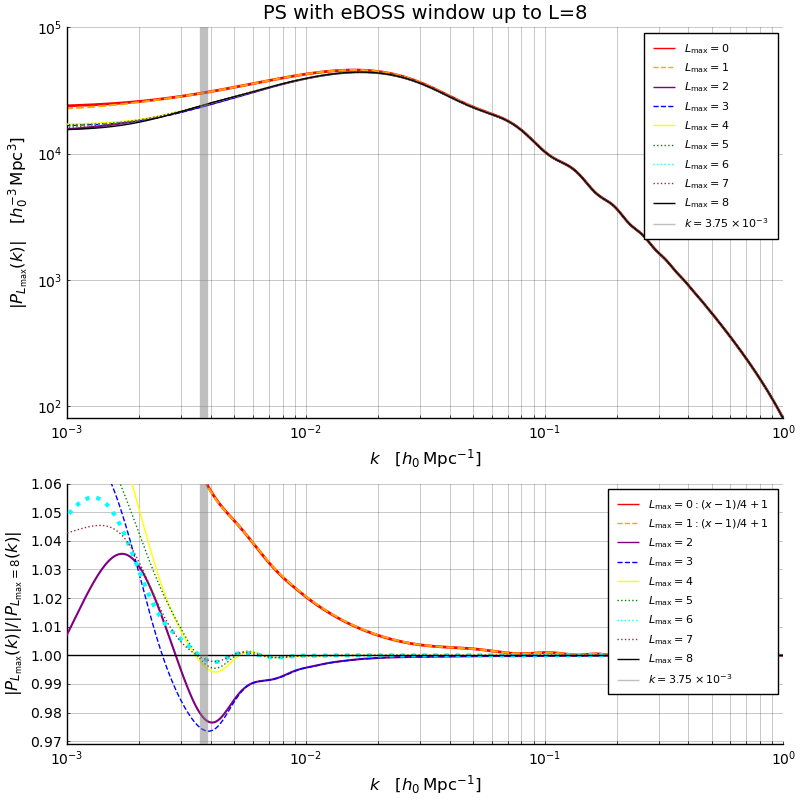

In [27]:
xs_1, ys_1 = ks_L0, pks_L0 ./ all_Q_l1[1][1]
xs_2, ys_2 = ks_L01, pks_L01 ./ all_Q_l1[1][1]
xs_3, ys_3 = ks_L012, pks_L012 ./ all_Q_l1[1][1]
xs_4, ys_4 = ks_L0123, pks_L0123 ./ all_Q_l1[1][1]
xs_5, ys_5 = ks_L01234, pks_L01234 ./ all_Q_l1[1][1]
xs_6, ys_6 = ks_L012345, pks_L012345 ./ all_Q_l1[1][1]
xs_7, ys_7 = ks_L0123456, pks_L0123456 ./ all_Q_l1[1][1]
xs_8, ys_8 = ks_L01234567, pks_L01234567 ./ all_Q_l1[1][1]
xs_9, ys_9 = ks_L012345678, pks_L012345678 ./ all_Q_l1[1][1]

p=plot(axis=:log, 
    ylabel = L"|P_{L_{\rm max}}(k)| \quad [h_0^{-3}\,\mathrm{Mpc}^3]", 
    xlabel=L"$k \quad [h_0 \,\mathrm{Mpc}^{-1}]$",
    title="PS with eBOSS window up to L=8",
    yticks=[10.0^i for i in 2:5], tickfontsize = 10, labelfontsize=12,
    xticks = (
        vcat([a*10.0^b for b in -3:(-1) for a in 1:9], 10.0^0), 
        vcat([a==1 ? L"10^{%$b}" : nothing for b in -3:(-1) for a in 1:9], L"10^{0}")
    ), gridalpha=0.3, ylims=(8e1,1e5),
    size=(900, 500), 
    xlims=(3.5e-3, 1e0),
)

plot!(p, xs_1[ys_1.≠0],abs.(ys_1)[ys_1.≠0], lw=2, lc=:red, ls=:solid, label=L"L_{\rm max}=0", )
plot!(p, xs_2[ys_2.≠0],abs.(ys_2)[ys_2.≠0], lw=1.5, lc=:orange, ls=:dash, label=L"L_{\rm max}=1")
plot!(p, xs_3[ys_3.≠0],abs.(ys_3)[ys_3.≠0], lw=1.5, lc=:purple, ls=:solid, label=L"L_{\rm max}=2")
plot!(p, xs_4[ys_4.≠0],abs.(ys_4)[ys_4.≠0], lw=1, lc=:blue, ls=:dash, label=L"L_{\rm max}=3")
plot!(p, xs_5[ys_5.≠0],abs.(ys_5)[ys_5.≠0], lw=1, lc=:yellow, ls=:solid, label=L"L_{\rm max}=4")
plot!(p, xs_6[ys_6.≠0],abs.(ys_6)[ys_6.≠0], lw=1, lc=:green, ls=:dot, label=L"L_{\rm max}=5")
plot!(p, xs_7[ys_7.≠0],abs.(ys_7)[ys_7.≠0], lw=1, lc=:cyan, ls=:dot, label=L"L_{\rm max}=6")
plot!(p, xs_8[ys_8.≠0],abs.(ys_8)[ys_8.≠0], lw=1, lc=:brown, ls=:dot, label=L"L_{\rm max}=7")
plot!(p, xs_9[ys_9.≠0],abs.(ys_9)[ys_9.≠0], lw=1, lc=:black, ls=:solid, label=L"L_{\rm max}=8")

vline!(p, [3.75e-3], lc=:gray, ls=:solid, lw=6, alpha=0.5, label=L"k=3.75\times10^{-3}")

r = plot(xaxis=:log, 
    ylabel = L"|P_{L_{\rm max}}(k)|/|P_{L_{\rm max}=8}(k)|", 
    xlabel=L"$k \quad [h_0 \,\mathrm{Mpc}^{-1}]$",
    #yticks=0.97:0.03:1.15, ylims=(0.969,1.15), 
    yticks=0.97:0.01:1.06, ylims=(0.969,1.06), 
    xticks = (
        vcat([a*10.0^b for b in -3:(-1) for a in 1:9], 10.0^0), 
        vcat([a==1 ? L"10^{%$b}" : nothing for b in -3:(-1) for a in 1:9], L"10^{0}")
    ), gridalpha=0.3, tickfontsize = 10, labelfontsize=12,
    size=(900, 300), 
    xlims=(3.5e-3, 1e0),
)
plot!(r, xs_1[ys_1.≠0],(abs.(ys_1)[ys_1.≠0] ./ abs.(ys_9)[ys_9.≠0] .- 1)./4 .+1 , lw=2, lc=:red, ls=:solid, label=L"L_{\rm max}=0 : (x-1)/4+1", )
plot!(r, xs_2[ys_2.≠0],(abs.(ys_2)[ys_2.≠0] ./ abs.(ys_9)[ys_9.≠0] .- 1)./4 .+1, lw=1.5, lc=:orange, ls=:dash, label=L"L_{\rm max}=1 : (x-1)/4+1")
plot!(r, xs_3[ys_3.≠0],abs.(ys_3)[ys_3.≠0] ./ abs.(ys_9)[ys_9.≠0], lw=1.5, lc=:purple, ls=:solid, label=L"L_{\rm max}=2")
plot!(r, xs_4[ys_4.≠0],abs.(ys_4)[ys_4.≠0] ./ abs.(ys_9)[ys_9.≠0], lw=1, lc=:blue, ls=:dash, label=L"L_{\rm max}=3")
plot!(r, xs_5[ys_5.≠0],abs.(ys_5)[ys_5.≠0] ./ abs.(ys_9)[ys_9.≠0], lw=1, lc=:yellow, ls=:solid, label=L"L_{\rm max}=4")
plot!(r, xs_6[ys_6.≠0],abs.(ys_6)[ys_6.≠0] ./ abs.(ys_9)[ys_9.≠0], lw=1, lc=:green, ls=:dot, label=L"L_{\rm max}=5")
plot!(r, xs_7[ys_7.≠0],abs.(ys_7)[ys_7.≠0] ./ abs.(ys_9)[ys_9.≠0], lw=3, lc=:cyan, ls=:dot, label=L"L_{\rm max}=6")
plot!(r, xs_8[ys_8.≠0],abs.(ys_8)[ys_8.≠0] ./ abs.(ys_9)[ys_9.≠0], lw=1, lc=:brown, ls=:dot, label=L"L_{\rm max}=7")
plot!(r, xs_9[ys_9.≠0],abs.(ys_9)[ys_9.≠0] ./ abs.(ys_9)[ys_9.≠0], lw=1, lc=:black, ls=:solid, label=L"L_{\rm max}=8")

vline!(r, [3.75e-3], lc=:gray, ls=:solid, lw=6, alpha=0.5, label=L"k=3.75\times10^{-3}")

P=plot(p,r, layout=@layout[a{0.6h};b], size=(800, 800))
savefig(P, "PS_with_eBOSS_Lmax_comparison.pdf")
P

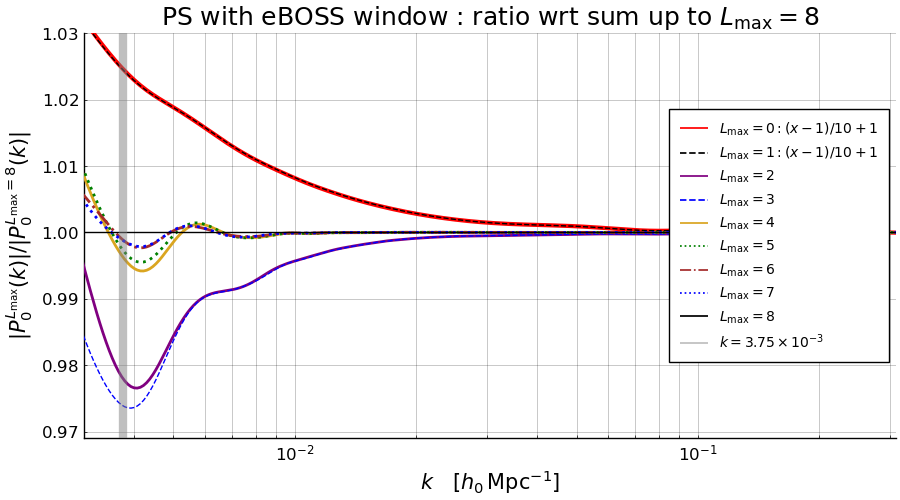

In [28]:
xs_1, ys_1 = ks_L0, pks_L0 ./ all_Q_l1[1][1]
xs_2, ys_2 = ks_L01, pks_L01 ./ all_Q_l1[1][1]
xs_3, ys_3 = ks_L012, pks_L012 ./ all_Q_l1[1][1]
xs_4, ys_4 = ks_L0123, pks_L0123 ./ all_Q_l1[1][1]
xs_5, ys_5 = ks_L01234, pks_L01234 ./ all_Q_l1[1][1]
xs_6, ys_6 = ks_L012345, pks_L012345 ./ all_Q_l1[1][1]
xs_7, ys_7 = ks_L0123456, pks_L0123456 ./ all_Q_l1[1][1]
xs_8, ys_8 = ks_L01234567, pks_L01234567 ./ all_Q_l1[1][1]
xs_9, ys_9 = ks_L012345678, pks_L012345678 ./ all_Q_l1[1][1]

r = plot(xaxis=:log, 
    ylabel = L"|P_0^{L_{\rm max}}(k)|/|P_0^{L_{\rm max}=8}(k)|", 
    xlabel=L"$k \quad [h_0 \,\mathrm{Mpc}^{-1}]$",
    title="PS with eBOSS window : ratio wrt sum up to "*L"L_{\rm max}=8",
    #yticks=0.97:0.03:1.15, ylims=(0.969,1.15), 
    yticks=0.97:0.01:1.03, ylims=(0.969,1.03), 
    xticks = (
        vcat([a*10.0^b for b in -3:(-1) for a in 1:9], 10.0^0)[3:(end-7)], 
        vcat([a==1 ? L"10^{%$b}" : nothing for b in -3:(-1) for a in 1:9], L"10^{0}")[3:(end-7)]
    ), gridalpha=0.3, tickfontsize = 12, labelfontsize=15, titlefontsize=18,legendfontsize=10,
    size=(900, 500), legend=:right,
    xlims=(3.5e-3, 3.1e-1),
)
plot!(r, xs_1[ys_1.≠0],(abs.(ys_1)[ys_1.≠0] ./ abs.(ys_9)[ys_9.≠0] .- 1)./10 .+1 , lw=3, lc=:red, ls=:solid, label=L"L_{\rm max}=0 : (x-1)/10+1", )
plot!(r, xs_2[ys_2.≠0],(abs.(ys_2)[ys_2.≠0] ./ abs.(ys_9)[ys_9.≠0] .- 1)./10 .+1, lw=1, lc=:black, ls=:dash, label=L"L_{\rm max}=1 : (x-1)/10+1")
plot!(r, xs_3[ys_3.≠0],abs.(ys_3)[ys_3.≠0] ./ abs.(ys_9)[ys_9.≠0], lw=2, lc=:purple, ls=:solid, label=L"L_{\rm max}=2")
plot!(r, xs_4[ys_4.≠0],abs.(ys_4)[ys_4.≠0] ./ abs.(ys_9)[ys_9.≠0], lw=1, lc=:blue, ls=:dash, label=L"L_{\rm max}=3")
plot!(r, xs_5[ys_5.≠0],abs.(ys_5)[ys_5.≠0] ./ abs.(ys_9)[ys_9.≠0], lw=2, lc=:goldenrod, ls=:solid, label=L"L_{\rm max}=4")
plot!(r, xs_6[ys_6.≠0],abs.(ys_6)[ys_6.≠0] ./ abs.(ys_9)[ys_9.≠0], lw=2, lc=:green, ls=:dot, label=L"L_{\rm max}=5")
plot!(r, xs_7[ys_7.≠0],abs.(ys_7)[ys_7.≠0] ./ abs.(ys_9)[ys_9.≠0], lw=2, lc=:brown, ls=:dashdot, label=L"L_{\rm max}=6")
plot!(r, xs_8[ys_8.≠0],abs.(ys_8)[ys_8.≠0] ./ abs.(ys_9)[ys_9.≠0], lw=2, lc=:blue, ls=:dot, label=L"L_{\rm max}=7")
plot!(r, xs_9[ys_9.≠0],abs.(ys_9)[ys_9.≠0] ./ abs.(ys_9)[ys_9.≠0], lw=1, lc=:black, ls=:solid, label=L"L_{\rm max}=8")

vline!(r, [3.75e-3], lc=:gray, ls=:solid, lw=6, alpha=0.5, label=L"k=3.75\times10^{-3}")

savefig(r, "PS_with_eBOSS_Lmax_ratio.pdf")
r

## END